# Modelization


### Importing libraries

In [1]:
import pandas as pd
pd.set_option("max_columns", 50)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import tree
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from collections import OrderedDict, defaultdict
from sklearn.externals import joblib
from sklearn.metrics import r2_score, mean_squared_error

### Convenience functions
* Chart Results: Compares target with predicted data:

In [2]:
def chartResults(y, predBest, trainTest, model=None):
    
    '''
    Example of use
    chartResults(y=y_train, predBest=predTrain, trainTest='Train', model='Decision Trees')
    '''
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y, predBest, s=20,alpha=0.1)
    plt.title(model + '\nPredicted Price vs. Real Price. \n' + trainTest + ' dataset')
    plt.xlabel('Real Price')
    plt.ylabel('Predicted Price')
    plt.plot([min(y), max(y)], [min(y), max(y)], 'y')
    
#    return plt.tight_layout()
    return plt.show()

* Results data frame:

In [3]:
modelizationResults = pd.DataFrame({'Algorithm': [], 
                                    'Fine_Tuning': [],
                                    'R2_Train': [], 
                                    'R2_Test': [], 
                                    'MSE_Train': [], 
                                    'MSE_Test': []})
modelizationResults

,Algorithm,Fine_Tuning,R2_Train,R2_Test,MSE_Train,MSE_Test


In [4]:
def rowOfResults(Algorithm, Fine_Tuning, R2_Train, R2_Test, MSE_Train, MSE_Test):
    '''
    Example:
    rowOfResults('Decision trees', True, 2, 3, 4, 5)
    '''
    tempResults = pd.DataFrame({'Algorithm': [Algorithm], 
                                'Fine_Tuning': [Fine_Tuning],
                                'R2_Train': [np.round(R2_Train, 3)],
                                'R2_Test': [np.round(R2_Test, 3)],
                                'MSE_Train': [np.round(MSE_Train, 0)],
                                'MSE_Test': [np.round(MSE_Test, 0)]})
    return tempResults

### Reading clean dataset


In [5]:
datasetCarsFinal = pd.read_csv('../data/autosFinal.csv',
                               usecols=[
                                      #'brand', 
                                      #'model', 
                                      'brandModel',
                                      'vehicleType', 
                                      'gearbox', 
                                      'yearOfRegistration',
                                      'fuelType',
                                      'powerPS',
                                      'kilometer',
                                      #'kilometerCategorical',
                                      #'kilometer000',
                                      'notRepairedDamage',
                                      #'postalCode',
                                      'state',
                                      'price'
                                      ],
                               dtype={
                                      #'brand': 'str', 
                                      #'model': 'str', 
                                      'brandModel': 'str', 
                                      'vehicleType': 'str', 
                                      'gearbox': 'str', 
                                      'yearOfRegistration': np.int64,
                                      'fuelType': 'str',
                                      'powerPS': np.int64,
                                      'kilometer': np.int64,
                                      #'kilometerCategorical': 'str',
                                      #'kilometer000': np.int64,
                                      'notRepairedDamage': 'str',
                                      #'postalCode': 'str',
                                      'state': 'str',
                                      'price': np.int64
                                      })

In [6]:
datasetCarsFinal.columns

Index(['state', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'fuelType', 'notRepairedDamage', 'kilometer', 'brandModel'],
      dtype='object')

In [7]:
datasetCarsFinal.head()

,state,price,vehicleType,yearOfRegistration,gearbox,powerPS,fuelType,notRepairedDamage,kilometer,brandModel
0,Bayern,9800,suv,2004,automatik,163,diesel,nein,125000,jeep grand
1,Bayern,1500,kleinwagen,2001,manuell,75,benzin,nein,150000,volkswagen golf
2,Hessen,3600,kleinwagen,2008,manuell,69,diesel,nein,90000,skoda fabia
3,Nordrhein-Westfalen,650,limousine,1995,manuell,102,benzin,ja,150000,bmw 3er
4,Rheinland-Pfalz,2200,cabrio,2004,manuell,109,benzin,nein,150000,peugeot 2_reihe


***

## Data setup
### Splitting dataset into target, and numerical and categorical predictors
This is necessary in order to use LabelEncoder only on categorical features

In [8]:
target = datasetCarsFinal['price']
numerical = datasetCarsFinal[['yearOfRegistration', 'powerPS', 'kilometer']]
categorical = datasetCarsFinal.drop(['yearOfRegistration', 'powerPS', 'price', 'kilometer'], axis=1)

Now, we can apply Label encoder to each categorical column and rejoin columns in a new data frame

In [9]:
d = defaultdict(LabelEncoder)
categorical_encoded = categorical.apply(lambda x: d[x.name].fit_transform(x))
datasetCarsFinalConcat = pd.concat([categorical_encoded, numerical], axis=1)

For later use, we will save label encoding using joblib

In [10]:
joblib.dump(d, '../output/carsLabelEncoder.pkl')

['../output/carsLabelEncoder.pkl']

### Create train and test datasets

In [11]:
np.random.seed(42)
train, test = train_test_split(datasetCarsFinalConcat.index, test_size = 0.2)

X_train = datasetCarsFinalConcat.loc[train]
y_train = target.loc[train]

X_test = datasetCarsFinalConcat.loc[test]
y_test = target.loc[test]

In [12]:
X_train.shape, y_train.shape 

((205724, 9), (205724,))

In [13]:
X_test.shape, y_test.shape

((51431, 9), (51431,))

Now, data is ready to modelization process

***

## Decision Trees
Our first try will be Decision Trees algorithm. No hyperparameters will be tuned for the moment:

In [ ]:
regrDT = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [ ]:
predDTTrain = regrDT.predict(X_train)
predDTTest = regrDT.predict(X_test)

### Model scores:  
* $R^2$ Score:

In [ ]:
R2DTTrain = r2_score(y_train, predDTTrain)
R2DTTest = r2_score(y_test, predDTTest)
print('R2 Train: %.3f' % R2DTTrain, '\nR2 Test:  %.3f' % R2DTTest)

* MSE Score:

In [ ]:
MSEDTTrain = mean_squared_error(y_train, predDTTrain)
MSEDTTest = mean_squared_error(y_test, predDTTest)
print('MSE Train:', format(MSEDTTrain, ',f'), '\nMSE Test:', format(MSEDTTest, ',f'))

In [ ]:
DTResults = rowOfResults('Decision trees', False, R2DTTrain, R2DTTest, MSEDTTrain, MSEDTTest)
DTResults

In [ ]:
modelizationResults = modelizationResults.append(DTResults)
modelizationResults

Almost perfect with train data, but low $R²$ in test

Not bad results, but maybe some signals of overfitting. Let's go to some fine tuning on hyperparameters and cross validation to improve results.  
### Hyperparameter tuning

In [ ]:
paramGridDT = {
        'criterion': ['mse'],
        'splitter': ['best', 'random'],
        'max_depth': list(range(1, 20 + 1)),
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [1],
        'max_features': ['auto']
        }

**ATTENTION**: With this paramGrid cross validation takes 2 minutes to complete

In [ ]:
cvDT = GridSearchCV(
        estimator = tree.DecisionTreeRegressor(),
        param_grid=paramGridDT,
        n_jobs=-1,
        cv=10,
        refit=False,
        verbose=1,
        return_train_score=True).fit(X_train, y_train)

These are the best parameters:

In [ ]:
cvDT.best_params_

In [ ]:
bestDecisionTree = tree.DecisionTreeRegressor(criterion=cvDT.best_params_['criterion'],
                                              max_depth=cvDT.best_params_['max_depth'],
                                              max_features=cvDT.best_params_['max_features'],
                                              min_samples_leaf=cvDT.best_params_['min_samples_leaf'],
                                              min_samples_split=cvDT.best_params_['min_samples_split'],
                                              splitter=cvDT.best_params_['splitter']).fit(X_train, y_train)

In [ ]:
predBestDTTrain = bestDecisionTree.predict(X_train)
predBestDTTest = bestDecisionTree.predict(X_test)

And the scores now are:

* $R^2$ Score:

In [ ]:
R2BestDTTrain = r2_score(y_train, predBestDTTrain)
R2BestDTTest = r2_score(y_test, predBestDTTest)
print('R2 Train: %.3f' % R2BestDTTrain, '\nR2 Test: %.3f' % R2BestDTTest)

* MSE Score:

In [ ]:
MSEBestDTTrain = mean_squared_error(y_train, predBestDTTrain)
MSEBestDTTest = mean_squared_error(y_test, predBestDTTest)
print('MSE Train:', format(MSEBestDTTrain, ',f'), '\nMSE Test:', format(MSEBestDTTest, ',f'))

In [ ]:
DTBestResults = rowOfResults('Decision trees', True, R2BestDTTrain, R2BestDTTest, MSEBestDTTrain, MSEBestDTTest)
DTBestResults

In [ ]:
modelizationResults = modelizationResults.append(DTBestResults)
modelizationResults

We have improved test results but losing precision in test data.

## Charting results

In [ ]:
chartResults(y=y_train, predBest=predBestDTTrain, trainTest='Train', model='Decision trees')

In [ ]:
chartResults(y=y_test, predBest=predBestDTTest, trainTest='Test', model='Decision trees')

In [ ]:
plt.barh(X_train.columns, bestDecisionTree.feature_importances_)

### Saving the model for later use

In [ ]:
joblib.dump(bestDecisionTree, filename='../output/bestDecisionTree.pkl')

***

# Random forest
This will be the second algorithm we are going to use in order to improve results obtained with Decision Trees. Let's try to model without hyperparamenter tuning.

In [ ]:
regrRF = RandomForestRegressor(n_jobs=-1,
                               verbose=1).fit(X_train,
                                              y_train)

In [ ]:
predRFTrain = regrRF.predict(X_train)
predRFTest = regrRF.predict(X_test)

### Model scores:  
* $R^2$ Score:

In [ ]:
R2RFTrain = r2_score(y_train, predRFTrain)
R2RFTest = r2_score(y_test, predRFTest)
print('R2 Train: %.3f' % R2RFTrain, '\nR2 Test:  %.3f' % R2RFTest)

* MSE Score:

In [ ]:
MSERFTrain = mean_squared_error(y_train, predRFTrain)
MSERFTest = mean_squared_error(y_test, predRFTest)
print('MSE Train:', format(MSERFTrain, ',f'), '\nMSE Test:', format(MSERFTest, ',f'))

In [ ]:
RFResults = rowOfResults('Random Forest', False, R2RFTrain, R2RFTest, MSERFTrain, MSERFTest)
RFResults

In [ ]:
modelizationResults = modelizationResults.append(RFResults)
modelizationResults

### Hyperparameter tuning
Test the optimum number of features

In [ ]:
np.random.seed(123)
scores = {}

rf = None

for max_features in [2,4,8, 'auto', None]:
    if rf is None:
        rf = RandomForestRegressor(n_estimators=50,
                                   max_features=max_features)
    else:
        rf.warm_start = False
        rf.max_features = max_features
    
    rf = rf.fit(X_train, y_train)
    scores[max_features] = rf.score(X_test, y_test)

In [ ]:
plt.plot([2, 4, 8, 'Auto', 'None'], scores.values())
plt.axhline(bestDecisionTree.score(X_test, y_test), linestyle='dashed', color='red')

In [ ]:
paramsRF = {
        'n_estimators': [50, 100, 200],
        'max_features': [4],
        'max_depth': list(range(1, 10 + 1)),
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf':[1]
        }

This param grid takes 1 hours

In [ ]:
cvRF = GridSearchCV(
        estimator=RandomForestRegressor(oob_score=True),
        param_grid=paramsRF,
        n_jobs=-1,
        cv=10,
        verbose=1,
        return_train_score=True).fit(X_train, y_train)

In [ ]:
cvRF.best_params_

In [ ]:
bestRandomForest = RandomForestRegressor(max_depth=cvRF.best_params_['max_depth'], 
                                        max_features=cvRF.best_params_['max_features'], 
                                        min_samples_leaf=cvRF.best_params_['min_samples_leaf'], 
                                        min_samples_split=cvRF.best_params_['min_samples_split'], 
                                        n_estimators=cvRF.best_params_['n_estimators']).fit(X_train, y_train)

In [ ]:
predBestRFTrain = bestRandomForest.predict(X_train)
predBestRFTest = bestRandomForest.predict(X_test)

### Model scores:  
* $R^2$ Score:

In [ ]:
R2BestRFTrain = r2_score(y_train, predBestRFTrain)
R2BestRFTest = r2_score(y_test, predBestRFTest)
print('R2 Train: %.3f' % R2BestRFTrain, '\nR2 Test: %.3f' % R2BestRFTest)

* MSE Score:

In [ ]:
MSEBestRFTrain = mean_squared_error(y_train, predBestRFTrain)
MSEBestRFTest = mean_squared_error(y_test, predBestRFTest)
print('MSE Train:', format(MSEBestRFTrain, ',f'), '\nMSE Test:', format(MSEBestRFTest, ',f'))

In [ ]:
RFBestResults = rowOfResults('Random Forest', True, R2BestRFTrain, R2BestRFTest, MSEBestRFTrain, MSEBestRFTest)
RFBestResults

In [ ]:
modelizationResults = modelizationResults.append(RFBestResults)
modelizationResults

## Charting results

In [ ]:
chartResults(y=y_train, predBest=predBestRFTrain, trainTest='Train', model='Random Forest')

In [ ]:
chartResults(y=y_test, predBest=predBestRFTest, trainTest='Test', model='Random Forest')

In [ ]:
plt.barh(X_train.columns, bestRandomForest.feature_importances_)

### Saving the model for later use

In [ ]:
joblib.dump(bestRandomForest, filename='../output/bestRandomForest.pkl')

***

# K-nearest neighbours

First try, no hyperparameter tuning

In [ ]:
regrKNN = neighbors.KNeighborsRegressor(n_jobs=-1).fit(X_train, y_train)

In [ ]:
predKNNTrain = regrKNN.predict(X_train)
predKNNTest = regrKNN.predict(X_test)

### Model score:  
* $R^2$ Score:

In [ ]:
R2KNNTrain = r2_score(y_train, predKNNTrain)
R2KNNTest = r2_score(y_test, predKNNTest)
print('R2 Train: %.3f' % R2KNNTrain, '\nR2 Test:  %.3f' % R2KNNTest)

* MSE Score:

In [ ]:
MSEKNNTrain = mean_squared_error(y_train, predKNNTrain)
MSEKNNTest = mean_squared_error(y_test, predKNNTest)
print('MSE Train:', format(MSEKNNTrain, ',f'), '\nMSE Test:', format(MSEKNNTest, ',f'))

In [ ]:
KNNResults = rowOfResults('K-nearest neighbours', False, R2KNNTrain, R2KNNTest, MSEKNNTrain, MSEKNNTest)
KNNResults

In [ ]:
modelizationResults = modelizationResults.append(KNNResults)
modelizationResults

### Hyperparameter tuning

In [15]:
# Cross Validation
paramsKNN = {
        'n_neighbors': [5, 10, 20],
        'weights': ['distance', 'uniform'],
        'algorithm': ['auto'],
        'leaf_size': [2,3,4],
        }

This params grid takes 1 hour

In [16]:
cvKNN = GridSearchCV(
        estimator=neighbors.KNeighborsRegressor(),
        param_grid=paramsKNN,
        n_jobs=-1,
        cv=10,
        verbose=1,
        return_train_score=True).fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 42.0min finished


In [17]:
cvKNN.best_params_

{'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 5, 'weights': 'distance'}

In [18]:
bestKNN = neighbors.KNeighborsRegressor(algorithm=cvKNN.best_params_['algorithm'], 
                                        leaf_size=cvKNN.best_params_['leaf_size'],
                                        n_neighbors=cvKNN.best_params_['n_neighbors'],
                                        weights=cvKNN.best_params_['weights']).fit(X_train, y_train)

In [19]:
predBestKNNTrain = bestKNN.predict(X_train)
predBestKNNTest = bestKNN.predict(X_test)

(array([  2.71490000e+04,   1.11560000e+04,   5.62600000e+03,
          3.17400000e+03,   1.77000000e+03,   1.02600000e+03,
          6.33000000e+02,   2.88000000e+02,   2.43000000e+02,
          1.12000000e+02,   5.90000000e+01,   5.00000000e+01,
          3.60000000e+01,   2.20000000e+01,   1.20000000e+01,
          1.90000000e+01,   1.60000000e+01,   9.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([    219.   ,    4301.025,    8383.05 ,   12465.075,   16547.1  ,
          20629.125,   24711.15 ,   28793.175,   32875.2  ,   36957.225,
          41039.25 ,

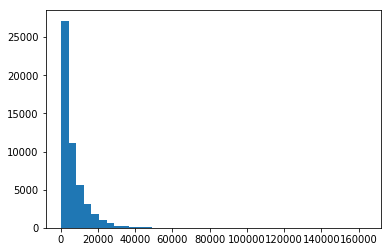

In [24]:
plt.hist(predBestKNNTest, bins=40)

### Model score:  
* $R^2$ Score:

In [20]:
R2BestKNNTrain = r2_score(y_train, predBestKNNTrain)
R2BestKNNTest = r2_score(y_test, predBestKNNTest)
print('R2 Train: %.3f' % R2BestKNNTrain, '\nR2 Test: %.3f' % R2BestKNNTest)

R2 Train: 0.991 
R2 Test: 0.821


* MSE Score:

In [21]:
MSEBestKNNTrain = mean_squared_error(y_train, predBestKNNTrain)
MSEBestKNNTest = mean_squared_error(y_test, predBestKNNTest)
print('MSE Train:', format(MSEBestKNNTrain, ',f'), '\nMSE Test:', format(MSEBestKNNTest, ',f'))

MSE Train: 558,304.809084 
MSE Test: 11,744,537.905573


In [22]:
KNNBestResults = rowOfResults('K-nearest neighbours', True, R2BestKNNTrain, R2BestKNNTest, MSEBestKNNTrain, MSEBestKNNTest)
KNNBestResults

,Algorithm,Fine_Tuning,R2_Train,R2_Test,MSE_Train,MSE_Test
0,K-nearest neighbours,True,0.991,0.821,558305.0,11744538.0


In [23]:
modelizationResults = modelizationResults.append(KNNBestResults)
modelizationResults

,Algorithm,Fine_Tuning,R2_Train,R2_Test,MSE_Train,MSE_Test
0,K-nearest neighbours,1.0,0.991,0.821,558305.0,11744538.0


## Charting results
Train data

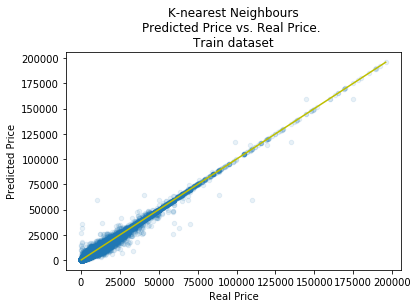

In [25]:
chartResults(y=y_train, predBest=predBestKNNTrain, trainTest='Train', model='K-nearest Neighbours')

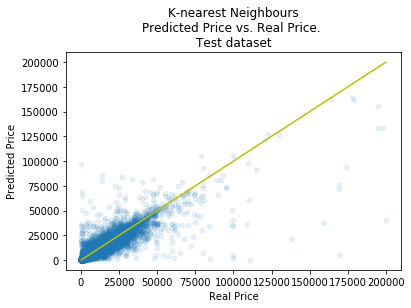

In [26]:
chartResults(y=y_test, predBest=predBestKNNTest, trainTest='Test', model='K-nearest Neighbours')

### Saving the model for later use

In [27]:
joblib.dump(bestKNN, filename='../output/bestKNN.pkl')

['../output/bestKNN.pkl']

***

# Gradient boosting

First try, no hyperparameters tuning

In [ ]:
regrBoost = GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
predBoostTrain = regrBoost.predict(X_train)
predBoostTest = regrBoost.predict(X_test)

### Model score:  
* $R^2$ Score:

In [ ]:
R2BoostTrain = r2_score(y_train, predBoostTrain)
R2BoostTest = r2_score(y_test, predBoostTest)
print('R2 Train: %.3f' % R2BoostTrain, '\nR2 Test:  %.3f' % R2BoostTest)

* MSE Score:

In [ ]:
MSEBoostTrain = mean_squared_error(y_train, predBoostTrain)
MSEBoostTest = mean_squared_error(y_test, predBoostTest)
print('MSE Train:', format(MSEBoostTrain, ',f'), '\nMSE Test:', format(MSEBoostTest, ',f'))

In [ ]:
BoostResults = rowOfResults('Gradient Boosting', False, R2BoostTrain, R2BoostTest, MSEBoostTrain, MSEBoostTest)
BoostResults

In [ ]:
modelizationResults = modelizationResults.append(BoostResults)
modelizationResults

In [ ]:
chartResults(y=y_train, predBest=predBoostTrain, trainTest='Train', model='Gradient boosting')

In [ ]:
chartResults(y=y_test, predBest=predBoostTest, trainTest='Test', model='Gradient boosting')

In [ ]:
plt.barh(X_train.columns, bestBoost.feature_importances_)

### Hyperparameter tuning

**ATTENTION** This paramgrid takes 3 hours to complete

In [ ]:
paramsBoost = {
        'learning_rate': [0.001, 0.01, 0.1],
        'n_estimators': [100, 200, 500],
        'max_depth': [1, 3, 5],
        'min_samples_split': [2],
        'min_samples_leaf': [1],
        'max_features': [None, 'auto']
        }

In [ ]:
cvBoost = GridSearchCV(
        estimator=GradientBoostingRegressor(),
        param_grid=paramsBoost,
        n_jobs=-1,
        cv=10,
        verbose=1,
        return_train_score=True).fit(X_train, y_train)

In [ ]:
cvBoost.best_params_

In [ ]:
bestBoost = GradientBoostingRegressor(learning_rate=cvBoost.best_params_['learning_rate'],
                                      max_depth=cvBoost.best_params_['max_depth'],
                                      max_features=cvBoost.best_params_['max_features'],
                                      min_samples_leaf=cvBoost.best_params_['min_samples_leaf'],
                                      min_samples_split=cvBoost.best_params_['min_samples_split'],
                                      n_estimators=cvBoost.best_params_['n_estimators']).fit(X_train, y_train)

In [ ]:
predBestBoostTrain = bestBoost.predict(X_train)
predBestBoostTest = bestBoost.predict(X_test)

* $R^2$ Score:

In [ ]:
R2BestBoostTrain = r2_score(y_train, predBestBoostTrain)
R2BestBoostTest = r2_score(y_test, predBestBoostTest)
print('R2 Train: %.3f' % R2BestBoostTrain, '\nR2 Test: %.3f' % R2BestBoostTest)

* MSE Score:

In [ ]:
MSEBestBoostTrain = mean_squared_error(y_train, predBestBoostTrain)
MSEBestBoostTest = mean_squared_error(y_test, predBestBoostTest)
print('MSE Train:', format(MSEBestBoostTrain, ',f'), '\nMSE Test:', format(MSEBestBoostTest, ',f'))

In [ ]:
BoostBestResults = rowOfResults('Gradient Boosting', True, R2BestBoostTrain, R2BestBoostTest, MSEBestBoostTrain, MSEBestBoostTest)
BoostBestResults

In [ ]:
modelizationResults = modelizationResults.append(BoostBestResults)
modelizationResults

## Charting results

In [ ]:
chartResults(y=y_train, predBest=predBestBoostTrain, trainTest='Train', model='Gradient boosting')

In [ ]:
chartResults(y=y_test, predBest=predBestBoostTest, trainTest='Test', model='Gradient boosting')

In [ ]:
plt.barh(X_train.columns, bestBoost.feature_importances_)

### Saving the model for later use

In [ ]:
joblib.dump(bestBoost, filename='../output/bestBoost.pkl')

***

### Saving the results data frame

In [ ]:
joblib.dump(modelizationResults, filename='../output/modelizationResults.pkl')
modelizationResults.to_csv(path_or_buf='../output/modelizationResults.csv')

# Testing things

In [29]:
bestDecisionTree = joblib.load('../output/bestDecisionTree.pkl')
bestRandomForest = joblib.load('../output/bestRandomForest.pkl')
bestKNN = joblib.load('../output/bestKNN.pkl')
bestBoost = joblib.load('../output/bestBoost.pkl')

(array([ 36971.,   3439.,  10702.,     73.,      0.,      0.,      0.,
             0.,      0.,    246.]),
 array([   700.,   3400.,   6100.,   8800.,  11500.,  14200.,  16900.,
         19600.,  22300.,  25000.,  27700.]),
 <a list of 10 Patch objects>)

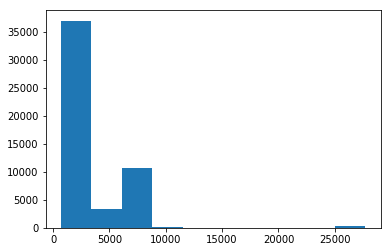

In [32]:
y_DT = bestDecisionTree.predict(X_test)
y_DT
plt.hist(y_DT)

(array([  3.28000000e+02,   2.37100000e+03,   2.70900000e+03,
          5.54900000e+03,   1.39490000e+04,   1.33400000e+04,
          1.41000000e+03,   8.03000000e+02,   1.74000000e+02,
          1.70000000e+01,   1.00000000e+00,   0.00000000e+00,
          4.30000000e+01,   1.79000000e+02,   1.65000000e+02,
          4.89000000e+02,   4.78000000e+02,   5.67000000e+02,
          7.11000000e+02,   1.11700000e+03,   1.16000000e+03,
          1.33600000e+03,   1.12800000e+03,   2.83300000e+03,
          4.40000000e+02,   0.00000000e+00,   2.00000000e+00,
          6.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          2.60000000e+01,   7.00000000e+00,   8.00000000e+00,
          1.00000000e+01,   3.00000000e+01,   6.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   1.50000000e+01,
          7.00000000e+00]),
 array([ 11313.82142774,  12465.72972737,  13617.63802699,  14769.54632662,
         15921.45462624,  17073.36292586,  18225.27122549,  19377.17952511,
         20529

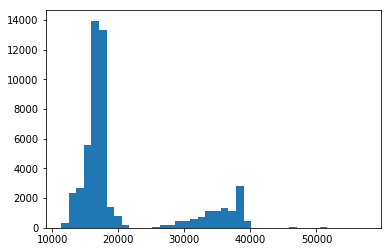

In [33]:
y_RF = bestRandomForest.predict(X_test)
y_RF
plt.hist(y_RF, bins=40)

(array([  2.71490000e+04,   1.11560000e+04,   5.62600000e+03,
          3.17400000e+03,   1.77000000e+03,   1.02600000e+03,
          6.33000000e+02,   2.88000000e+02,   2.43000000e+02,
          1.12000000e+02,   5.90000000e+01,   5.00000000e+01,
          3.60000000e+01,   2.20000000e+01,   1.20000000e+01,
          1.90000000e+01,   1.60000000e+01,   9.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([    219.   ,    4301.025,    8383.05 ,   12465.075,   16547.1  ,
          20629.125,   24711.15 ,   28793.175,   32875.2  ,   36957.225,
          41039.25 ,

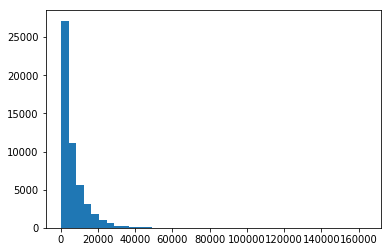

In [31]:
y_KNN = bestKNN.predict(X_test)
y_KNN
plt.hist(y_KNN, bins=40)

(array([  2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          6.00000000e+00,   9.00000000e+00,   8.00000000e+00,
          2.10000000e+01,   2.00000000e+01,   1.10000000e+01,
          2.60000000e+01,   2.10000000e+01,   3.10000000e+01,
          7.00000000e+01,   1.60000000e+02,   1.53000000e+02,
          6.86000000e+02,   1.02400000e+03,   3.25400000e+03,
          1.55200000e+03,   2.58500000e+03,   1.17300000e+03,
          4.78500000e+03,   7.97200000e+03,   7.11000000e+03,
          3.79700000e+03,   3.96600000e+03,   1.45700000e+03,
          1.80200000e+03,   2.14600000e+03,   5.53000000e+02,
          1.21000000e+03,   1.26000000e+03,   1.99000000e+03,
          4.52000000e+02,   3.60000000e+02,   8.61000000e+02,
          8.92000000e+02]),
 array([ -32215.53919095,  -28760.16033132,  -25304.7814717 ,
         -21849.40261208,  -18394.02375246,  -14938.64489284,
         -11483.26603322,   -8027.8871736 

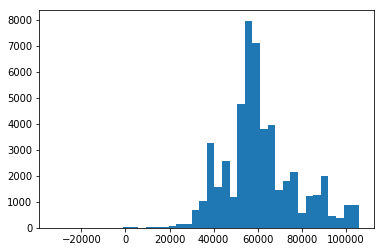

In [34]:
y_Boost = bestBoost.predict(X_test)
y_Boost
plt.hist(y_Boost, bins=40)

In [ ]:
plt.hist(y_test, bins=40)

In [14]:
res = joblib.load('../output/modelizationResults.pkl')
res

,Algorithm,Fine_Tuning,R2_Train,R2_Test,MSE_Train,MSE_Test
0,Decision trees,0.0,0.991,0.812,544289.0,12328600.0
0,Decision trees,1.0,0.932,0.852,4301122.0,9734722.0
0,Random Forest,0.0,0.973,0.876,1723044.0,8129881.0
0,Random Forest,1.0,0.895,0.859,6671635.0,9241547.0
0,K-nearest neighbours,0.0,0.915,0.851,5399808.0,9747325.0
0,K-nearest neighbours,1.0,0.991,0.864,560582.0,8912375.0
0,Gradient Boosting,0.0,0.823,0.813,11192151.0,12263595.0
0,Gradient Boosting,0.0,0.934,0.887,4180363.0,7423882.0
0,Gradient Boosting,1.0,0.934,0.887,4180363.0,7423882.0


In [ ]:
boostPrices = pd.DataFrame({'Real prices': y_test,
                           'PredPrices': y_Boost})
boostPrices.head(20)